In [71]:
from understatscraper import Understat

import pandas as pd
import numpy as np
import matplotlib as zpl
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch, VerticalPitch

In [7]:
match_id = pd.read_csv('Understat_match_ids.csv')
match_id

,Unnamed: 0,match_id,year,competition
0,0,81,2015,EPL
1,1,82,2015,EPL
2,2,83,2015,EPL
3,3,84,2015,EPL
4,4,85,2015,EPL
...,...,...,...,...
12868,1371,17867,2021,Ligue 1
12869,1372,17868,2021,Ligue 1
12870,1373,17869,2021,Ligue 1
12871,1374,17870,2021,Ligue 1


In [3]:
understat = Understat()

In [28]:
df = understat.season('EPL', 2020)

C:\Users\Enrique\PythonProjects\anaconda3\lib\site-packages\understatscraper\__init__.py:50: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  home_df = json_normalize(data['h'],sep='_')
C:\Users\Enrique\PythonProjects\anaconda3\lib\site-packages\understatscraper\__init__.py:51: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  away_df = json_normalize(data['a'],sep='_')


In [29]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,376477,6,SavedShot,0.785,0.24899999618530275,0.020527511835098267,Denis Odoi,h,7077,OpenPlay,2020,LeftFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,Ivan Cavaleiro,Pass
1,376481,9,BlockedShot,0.9330000305175781,0.34200000762939453,0.04542940855026245,Neeskens Kebano,h,6840,OpenPlay,2020,RightFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,Ivan Cavaleiro,Cross
2,376487,55,MissedShots,0.8130000305175781,0.3189999961853027,0.020672235637903214,Aboubakar Kamara,h,4866,SetPiece,2020,RightFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,None,None
3,376490,66,SavedShot,0.8030000305175782,0.655,0.03421450033783913,Aleksandar Mitrovic,h,773,OpenPlay,2020,RightFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,Franck Zambo,Pass
4,376494,89,MissedShots,0.595999984741211,0.29200000762939454,0.005482853390276432,Bobby Reid,h,6827,OpenPlay,2020,RightFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,None,None


In [38]:
df.to_csv('epl2020.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [39]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
3,376490,66,SavedShot,0.803,0.655,0.034215,Aleksandar Mitrovic,h,773,OpenPlay,2020,RightFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,Franck Zambo,Pass
4,376494,89,MissedShots,0.596,0.292,0.005483,Bobby Reid,h,6827,OpenPlay,2020,RightFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,NaN,None
5,376478,7,MissedShots,0.848,0.602,0.064353,Granit Xhaka,a,204,OpenPlay,2020,LeftFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,Pierre-Emerick Aubameyang,Pass
6,376479,7,SavedShot,0.954,0.493,0.648782,Willian,a,700,OpenPlay,2020,RightFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,NaN,Rebound
7,376480,8,Goal,0.974,0.470,0.758089,Alexandre Lacazette,a,3277,OpenPlay,2020,LeftFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,NaN,Rebound


In [79]:
df1 = df.loc[df['player']=='Sadio Mané']
df1['x'] = df['X']*100
df1['y'] = df['Y']*100
df1

<ipython-input-79-d2bc245094f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['x'] = df['X']*100
<ipython-input-79-d2bc245094f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y'] = df['Y']*100


,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,x,y
103,376611,39,BlockedShot,0.849,0.557,0.106880,Sadio Mané,h,838,OpenPlay,...,14090,Liverpool,Leeds,4,3,2020-09-12 16:30:00,Georginio Wijnaldum,Pass,84.900002,55.700001
104,376612,39,BlockedShot,0.862,0.560,0.088088,Sadio Mané,h,838,OpenPlay,...,14090,Liverpool,Leeds,4,3,2020-09-12 16:30:00,NaN,Rebound,86.199997,56.000000
109,376618,61,MissedShots,0.777,0.591,0.056145,Sadio Mané,h,838,OpenPlay,...,14090,Liverpool,Leeds,4,3,2020-09-12 16:30:00,Mohamed Salah,Pass,77.699997,59.099998
110,376620,67,BlockedShot,0.867,0.333,0.046994,Sadio Mané,h,838,OpenPlay,...,14090,Liverpool,Leeds,4,3,2020-09-12 16:30:00,Mohamed Salah,Pass,86.699997,33.299999
111,376621,70,BlockedShot,0.788,0.627,0.025546,Sadio Mané,h,838,OpenPlay,...,14090,Liverpool,Leeds,4,3,2020-09-12 16:30:00,Mohamed Salah,TakeOn,78.800003,62.700001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,423351,39,BlockedShot,0.889,0.456,0.119852,Sadio Mané,a,838,OpenPlay,...,14796,Burnley,Liverpool,0,3,2021-05-19 19:15:00,Mohamed Salah,Pass,88.900002,45.599998
8765,423366,85,BlockedShot,0.765,0.551,0.033716,Sadio Mané,a,838,OpenPlay,...,14796,Burnley,Liverpool,0,3,2021-05-19 19:15:00,Trent Alexander-Arnold,Pass,76.500000,55.099998
9112,424056,31,MissedShots,0.863,0.620,0.082547,Sadio Mané,h,838,OpenPlay,...,14810,Liverpool,Crystal Palace,2,0,2021-05-23 15:00:00,Georginio Wijnaldum,Pass,86.300003,62.000000
9114,424058,35,Goal,0.963,0.470,0.744514,Sadio Mané,h,838,FromCorner,...,14810,Liverpool,Crystal Palace,2,0,2021-05-23 15:00:00,Roberto Firmino,Pass,96.300003,47.000000


In [48]:
df2 = df.drop(['id', 'player_id', 'situation','season', 'h_goals', 'a_goals', 'date'], axis=1)
df2

,minute,result,X,Y,xG,player,h_a,shotType,match_id,h_team,a_team,player_assisted,lastAction
3,66,SavedShot,0.803,0.655,0.034215,Aleksandar Mitrovic,h,RightFoot,14086,Fulham,Arsenal,Franck Zambo,Pass
4,89,MissedShots,0.596,0.292,0.005483,Bobby Reid,h,RightFoot,14086,Fulham,Arsenal,NaN,None
5,7,MissedShots,0.848,0.602,0.064353,Granit Xhaka,a,LeftFoot,14086,Fulham,Arsenal,Pierre-Emerick Aubameyang,Pass
6,7,SavedShot,0.954,0.493,0.648782,Willian,a,RightFoot,14086,Fulham,Arsenal,NaN,Rebound
7,8,Goal,0.974,0.470,0.758089,Alexandre Lacazette,a,LeftFoot,14086,Fulham,Arsenal,NaN,Rebound
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9230,42,MissedShots,0.807,0.685,0.020726,Alex Telles,a,LeftFoot,14814,Wolverhampton Wanderers,Manchester United,Anthony Elanga,Cross
9231,43,MissedShots,0.754,0.296,0.012011,Donny van de Beek,a,RightFoot,14814,Wolverhampton Wanderers,Manchester United,NaN,None
9232,48,Goal,0.885,0.500,0.761169,Juan Mata,a,LeftFoot,14814,Wolverhampton Wanderers,Manchester United,NaN,Standard
9233,57,MissedShots,0.882,0.440,0.369126,Daniel James,a,RightFoot,14814,Wolverhampton Wanderers,Manchester United,Amad Diallo Traore,Throughball


In [49]:
text_color = 'w'

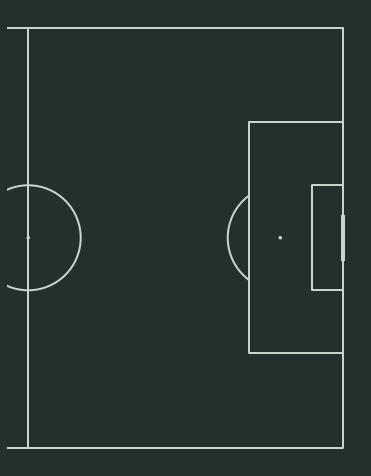

In [82]:
fig, ax = plt.subplots(figsize=(13, 8.5))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', orientation='vertical', 
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(16,11),
              constrained_layout=True, tight_layout=False, half=True)

pitch.draw(ax=ax)

plt.scatter(df1['X'], df1['Y'])